## SI 670 Applied Machine Learning, Week 1:  A simple classification task

In [3]:
# 查看目前的工作路径
import os
path = os.getcwd()
print(path)

/Users/peilinqiu/Desktop/Python/SI670/Week 1/Lab1


In [1]:
# run this cell if you are using Jupyter
files = {'fruit_data_with_colors.txt': 'fruit_data_with_colors.txt',
         'iris.data': 'iris.data'}

In [2]:
# # run this cell if you are using Colab

# !rm -rf fruit_data_with_colors.txt
# !rm -rf iris.data
# !rm -rf adspy_shared_utilities.py

# import io

# from google.colab import files as colab_files
# uploaded = colab_files.upload()
# files = {'fruit_data_with_colors.txt': io.BytesIO(uploaded['fruit_data_with_colors.txt']),
#          'iris.data': io.BytesIO(uploaded['iris.data'])}

# # upload 'fruit_data_with_colors.txt', 'iris.data', and 'adspy_shared_utilities.py'

### Load and examine data

In [4]:
# import required modules and load data file
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

fruits = pd.read_csv(files['fruit_data_with_colors.txt'], sep='\t')

In [5]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

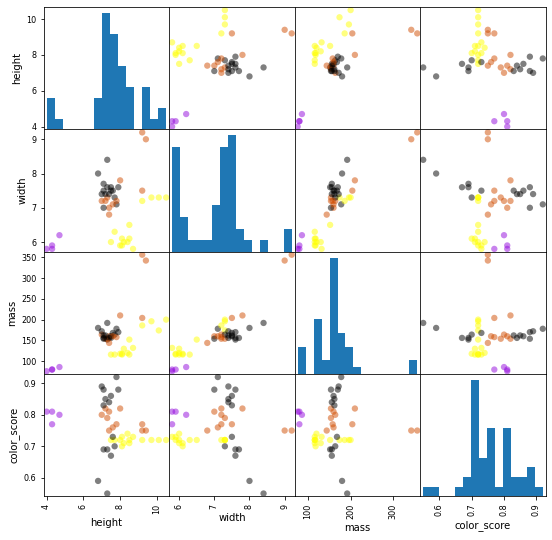

In [7]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

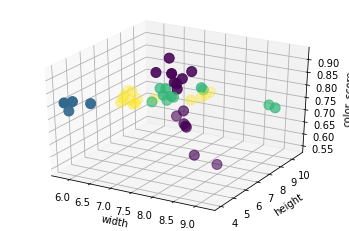

In [8]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### (Exercise) Try to explore a different dataset (Iris) by yourself
The Iris dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant. Each instance is described by 4 features: 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'.

In [9]:
# load data
iris = pd.read_csv(
    files['iris.data'], 
    sep=',', 
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_type'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# add a column 'iris_label' of numeric labels like the 'fruit_label' column in fruits, based on the 'iris_type' column

unique_iris_types = iris.iris_type.unique()
lookup_iris_type = dict(zip(range(len(unique_iris_types)), unique_iris_types))

## Your code: map iris_type to numeric labels for each instance and add a 'iris_label' column to the dataframe
    
lookup_iris_label = dict(zip(unique_iris_types, range(len(unique_iris_types))))
iris['iris_label'] = list(map(lambda x: lookup_iris_label[x], iris.iris_type))

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_type,iris_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


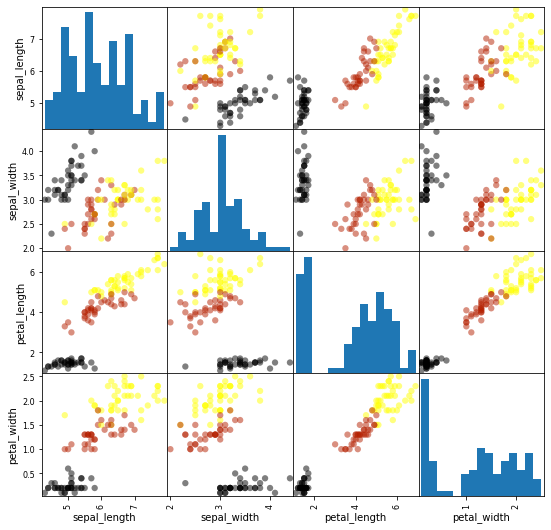

In [12]:
# plotting a scatter matrix

## Your code here
from matplotlib import cm

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['iris_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

### Train and evaluate a k-NN classifier

In [13]:
# for this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# create train/test split, default is 75% / 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# alternatively you can create a split with a specific train size, for example for a train with 44 records
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=44, random_state=0)

#### Question related to train/test split:
In the previous data exploration stage, we only looked at the training data. Why don't we look at the full dataset?

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# create a classifier object
knn = KNeighborsClassifier(n_neighbors = 5)

In [16]:
# train the classifier (fit the estimator) using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# estimate the accuracy of the classifier on future data, using the test data
knn.score(X_test, y_test)

0.5333333333333333

#### Use the trained k-NN classifier model to classify new, previously unseen objects

In [19]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [20]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### (Exercise) Train a classifier on the Iris dataset

In [26]:
# for this example, we use all the features of each iris instance
iris_X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_y = iris['iris_label']

# create train/test split with train_size = 112
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, train_size=112, random_state=0)

# create a classifier object
iris_knn = KNeighborsClassifier(n_neighbors = 5)

In [29]:
# train the classifier (fit the estimator) using the training data

## Your code
iris_knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier()

In [30]:
# estimate the accuracy of the classifier on future data, using the test data

## Your code
iris_knn.score(iris_X_test, iris_y_test)

0.9736842105263158

### Further investigations of the classifier

#### Plot the decision boundaries of the k-NN classifier

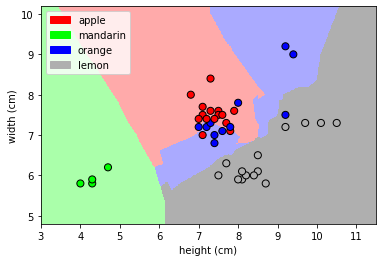

In [31]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

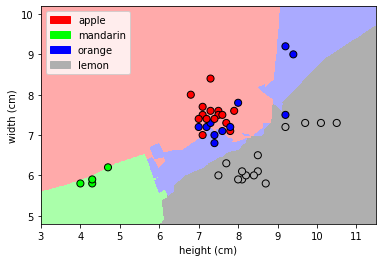

In [33]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, y_train, 10, 'uniform')   # we choose 10 nearest neighbors

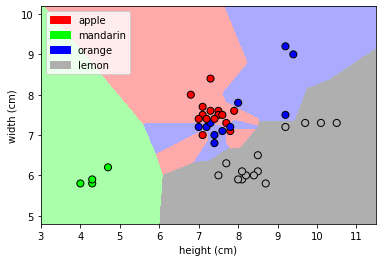

In [34]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, y_train, 1, 'uniform')   # we choose 1 nearest neighbors

#### Why feature scales matter?

In [35]:
# let's scale down the 'width' feature
scaled_X = X.copy()
scaled_X.loc[:, 'width'] = 0.05 * X.loc[:, 'width']

# create train/test split as previous
scaled_X_train, scaled_X_test, y_train, y_test = train_test_split(scaled_X, y, random_state=0)

# create another classifier object
another_knn = KNeighborsClassifier(n_neighbors = 5)
another_knn.fit(scaled_X_train, y_train)
print('accuracy: {}'.format(another_knn.score(scaled_X_test, y_test)))

accuracy: 0.4666666666666667


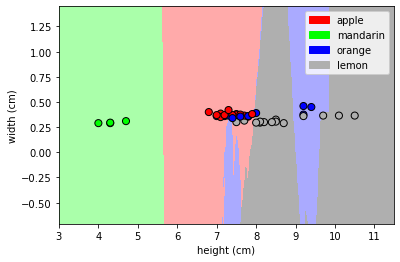

In [36]:
plot_fruit_knn(scaled_X_train, y_train, 5, 'uniform')

accuracy: 0.6666666666666666


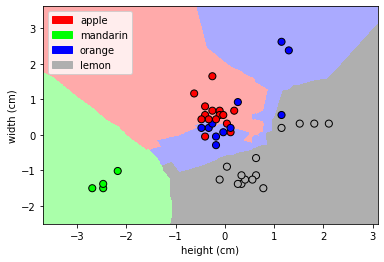

In [37]:
# standardize the inappropriately scaled features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns = scaled_X_train.columns
standardized_X_train = scaled_X_train.copy()
standardized_X_test = scaled_X_test.copy()

standardized_X_train[columns] = scaler.fit_transform(scaled_X_train[columns])
standardized_X_test[columns] = scaler.transform(scaled_X_test[columns])

another_knn.fit(standardized_X_train, y_train)
print('accuracy: {}'.format(another_knn.score(standardized_X_test, y_test)))
plot_fruit_knn(standardized_X_train, y_train, 5, 'uniform')

#### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

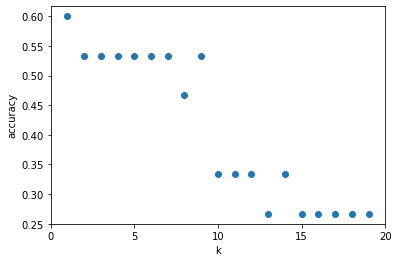

In [38]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

#### (Exercise) How sensitive is k-NN classification accuracy to the train/test split proportion?

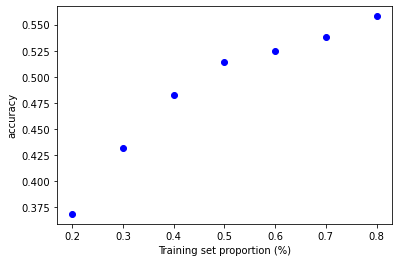

In [40]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

## YOUR code: use scikit-learn to create an instance of a k-NN classifer called "knn" with k=5 nearest neighbors.
knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):  # randomly repeat 1000 times
        ## YOUR code: create train-test split from X and y, with test proportion 1-s)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=s)  # NOTE: you should remove `random_state=0` to have random samples!!!
        ## YOUR code: fit the k-NN classifier using the training data
        knn.fit(X_train, y_train)
        ## YOUR code: get the accuracy of the k-NN classifier on the test data, and append that score to the "scores" list
        scores.append(knn.score(X_test, y_test))
        
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

### (Open question) How does k-NN perform on data of different feature dimensions?
Use the following synthetic data generation as a starting point to explore how k-NN is affected by feature dimension.

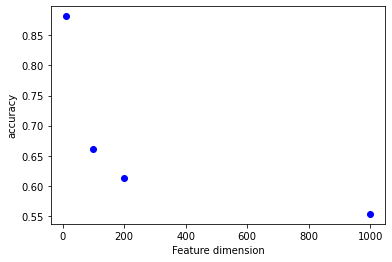

In [44]:
# generate n synthetic data points from [0, 1]^d; label is positive if x_1 > 0.5
RANDOM_STATE = np.random.RandomState(0)
def generate_data(n, d):
    X = RANDOM_STATE.uniform(size=(n, d))
    y = (X[:, 0] > 0.5).astype(int)
    return X, y

## Your code: design and implement experiments to explore how k-NN is affected by feature dimension
    
knn = KNeighborsClassifier(n_neighbors = 5)
n = 500

plt.figure()

for d in [10, 100, 200, 1000]:
    scores = []
    for i in range(1000):
        X, y = generate_data(n, d)
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(d, np.mean(scores), 'bo')
    
plt.xlabel('Feature dimension')
plt.ylabel('accuracy');